<a href="https://colab.research.google.com/gist/jdrapala/77b425ff8b2cbf1b92740f917183d11b/msid_5_optymalizacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Optymalizacja numeryczna**

**Metody analityczne** - rozwiązanie ma postać <font color='blue'> jawnego wzoru </font>, wynik jest <font color='blue'> dokładny </font>.
<br>
**Metody numeryczne** - rozwiązanie uzyskiwane jest <font color='blue'> w sposób iteracyjny </font> (_metodą kolejnych przybliżeń_), wynik jest <font color='blue'> przybliżony </font>.

Notatnik podzielony jest na dwie części:


I.   przedstawienie sposobu korzystania z bibliotecznych implementacji metod optymalizacji, <br>
II.   objaśnienie zasad działania bibliotecznych algorytmów optymalizacji.

Z części I dowiesz się <font color='orange'>**jak tego używać**</font>. <br>
W II części zgłębisz <font color='orange'>**w jaki sposób to działa**</font>, co zwiększy szansę, że we własnych projektach użyjesz tych metod bardziej efektywnie.



---
### **Część I** - <font color='orange'>jak tego używać.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#### **Optymalizacja bez ograniczeń**

Zaczynamy od funkcji jednej zmiennej:
$$F(x) = \cos x - 3\exp\left[-(x-0.2)^2\right]$$

In [2]:
def Fcelu(x):
  return np.cos(x) - 3 * np.exp ( -(x - 0.2) ** 2)

x_pocz = np.random.uniform(-1,4)
optimize.fmin(Fcelu, x_pocz)  # implementacja metody Neldera-Meada 

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 17
         Function evaluations: 34


array([0.23963026])

In [4]:
def Fcelu(x):
  return np.cos(x) - 3 * np.exp ( -(x - 0.2) ** 2)

x_pocz = np.random.uniform(-1,4)
optimize.fmin(Fcelu, x_pocz)  # implementacja metody Neldera-Meada 

Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 17
         Function evaluations: 34


array([3.13845839])

A jeżeli trzeba znaleźć maksimum?
$$ \arg\max F(x) = \arg\min-F(x)$$

In [ ]:
def neg_Fcelu(x):
  return -Fcelu(x)

optimize.fmin(neg_Fcelu, np.random.uniform(-1,4))

Optimization terminated successfully.
         Current function value: 0.444603
         Iterations: 11
         Function evaluations: 22


array([1.67973889])

Obsługa funkcji wielowymiarowych, czyli takich, dla których $\mathbf{x} \in \Re^N$ jest analogiczna. <br>
Zaczynamy od funkcji, której minimum jest oczywiste:
$$F(x)=(x_1−2)^2+(x_2+1)^2, \quad \text{ gdzie } \mathbf{x} = \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right].$$

Argument ```x``` jako tabela równoważna wektorowi $\mathbf{x}$.

In [6]:
def Fcelu(x):
  return (x[0]-2)**2 + (x[1]+1)**2

Fcelu([3,-0.5])

1.25

Problem: współrzędnej $x_i$ odpowiada ```x[i-1]```, przez co łatwo o zamieszanie.

Lepiej zrobić to tak: 

In [ ]:
def Fcelu(x):
  x1, x2 = x       # tak zwane rozpakowanie krotki
  return (x1-2)**2 + (x2+1)**2

Zwróć uwagę, że rozwiązanie początkowe musi być teraz dwuwymiarowe.

In [10]:
x_pocz = np.random.normal(loc=0, scale=0.1, size=2)
x_opt = optimize.fmin(Fcelu, x_pocz, disp=False)   # tym razem wyłączam raport optymalizatora
print(f'Optimum jest w punkcie {x_opt}\nWartość funkcji celu w optimum to {Fcelu(x_opt):f}')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 53
         Function evaluations: 101
Optimum jest w punkcie [ 1.99998371 -0.99998836]
Wartość funkcji celu w optimum to 0.000000


Wypróbuj w działaniu bardziej zaawansowane matematycznie procedury, np.: 
* [`fmin_powell`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_powell.html),
* [`fmin_cg`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html),
* [`fmin_bfgs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html).

Pomimo znacznie większego ładunku teoretycznego, stosuje się je identycznie jak procedurę `fmin`. 

Procedura [`minimize_scalar`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html) opakowuje różne procedury minimalizacji funkcji jednej zmiennej, pełniąc dla nich rolę interfejsu programisty. Procedura zwraca słownik zawierający najwazniejsze informacje o rezultacie procesu optymalizacji. Pod kluczem `x` znajduje się rozwiązanie.

In [18]:
optimize.minimize(Fcelu, x0=x_pocz, method='L-BFGS-B')

      fun: 3.961101597249373e-15
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.15168305e-07, 7.91667115e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 2.00000005, -0.99999997])

In [ ]:
optimize.minimize(Fcelu, x0=x_pocz, method='Nelder-Mead').x      # odpowiednik wywołania optimize.fmin(...)

array([ 1.99999489, -1.00002988])

W trudnych sytuacjach tonący brzytwy się chwyta, a w dziedzinie optymalizacji brzytwą jest metoda przeglądu zupełnego (ang. *brute force*, *grid search*).<br>
Należy określić z góry kostkę w $N$-wymiarowej przestrzeni rozwiązań, która będzie brutalnie przeszukiwana.

In [36]:
optimize.brute(Fcelu, (slice(-10, 0, 0.1), slice(1, 6, 0.1)), disp=True)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 55
         Function evaluations: 104


array([ 2.000027  , -0.99997337])

### **Optymalizacja z ograniczeniami**


Najłatwiej obsłużyc ograniczenia w postaci prostych **przedziałów dozwolonych wartości**, które wycinają z przestrzeni rozwiązań $N$-wymiarową kostkę.

Funkcja celu: 
$$F(\mathbf{x}) = (x_1-1)^2 + (x_2+2)^2 + x_1x_2$$
Ograniczenia: 
$$3.5 \leq x_1 \leq 6$$
$$-5 \leq x_2 \leq -2$$

In [37]:
def Fcelu(x):
    x1, x2 = x
    return (x1-1)**2 + (x2+2)**2 +x1*x2

ograniczenia = {'x1': (3.5, 6), 
                'x2': (-5,-2)}

x_pocz = (np.random.uniform(*ograniczenia['x1']),
          np.random.uniform(*ograniczenia['x2']))
optimize.minimize(Fcelu, x_pocz, method='TNC', bounds=list(ograniczenia.values())).x

array([ 3.5      , -3.7500001])

**Ograniczenia jako funkcje** $g$ <br>

Dla tej samej funkcji celu, co wcześniej wymieniamy ograniczenie na:<br>
$g(\mathbf{x}) = x_2 + 2 + 2(x_1-3)^2 - (x_1 - 3)^4 \geq 0$. <br>
Zwróć uwagę, że w optymalizatorze obowiązuje konwencja $g(x) \geq 0$, odwrotna niż na wykładzie.

In [38]:
def g(x):
    x1, x2 = x
    return x2 + 2 + 2*(x1-3)**2 - (x1-3)**4

# Constraint type: 'eq' for equality, 'ineq' for inequality.
ograniczenia = {'type': 'ineq', 'fun': g}

x_pocz = np.random.uniform(-5,5, size=2)
optimize.minimize(Fcelu, x_pocz, method='SLSQP', constraints=ograniczenia).x

array([ 2.19314827, -2.87820583])

Wypróbujmy inny optymalizator: [```fmin_cobyla```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cobyla.html).<br>
Funkcja celu: 
$$F(\mathbf{x}) = x_1 x_2$$
Ograniczenia: 
$$x_1^2 + x_2^2 \leq 1$$ 
$$x_2 \geq 0$$

Zauważ, że procedura zakłada ograniczenia nierównościowe w postaci: 
$$g(\mathbf{x}) > 0$$
odwrotnie niż na naszych zajęciach.

In [101]:
def Fcelu(x):
    x1, x2 = x
    return x1*x2

def g1(x):
    x1, x2 = x
    return 1 - (x1**2 + x2**2)

def g2(x):
    x1, x2 = x
    return x2

x_pocz = np.random.uniform(0, 1, size=2)
x_opt = optimize.fmin_cobyla(Fcelu, x_pocz, cons=[g1, g2])
print(f'Minimum: {x_opt}')
print(f'g1: {g1(x_opt):f}')
print(f'g2: {g2(x_opt):f}')

Minimum: [ 9.99059642e-01 -3.54566828e-52]
g1: 0.001880
g2: -0.000000


**Ograniczenia równościowe**: $\quad g(\mathbf{x})=0$ <br>
Funkcja celu: 
$$F(\mathbf{x}) = -x_1^2 - x_2^2 - x_3^2$$ 
Ograniczenia: 
$$x_1 = x_3$$
$$x_3 = x_1 + x_2 - 5$$

In [100]:
def Fcelu(x):
    x1, x2, x3 = x
    return x1**2 + x2**2 + x3**2

def g1(x):
    x1, x2, x3 = x
    return x1 - x3

def g2(x):
    x1, x2, x3 = x
    return x1 + x2 - 5 - x3

ograniczenia = ({'type': 'eq', 'fun': g1},
                {'type': 'eq', 'fun': g2})

x_pocz = np.random.uniform(0, 1, size=3)
optimize.minimize(Fcelu, x_pocz, method='SLSQP', constraints=ograniczenia)

     fun: 25.000000000000007
     jac: array([ 0., 10.,  0.])
 message: 'Optimization terminated successfully'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([-5.89496423e-08,  5.00000000e+00, -5.89496423e-08])

W celu rozwiązania zadań __programowania liniowego__ (i ogólnie zadań _programowania_ w optymalizacji) odsyłam zainteresowane osoby do metod dedykowanych:
* [```linprog```](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linprog.html),
* [cvxopt](https://cvxopt.org/) (biblioteka zewnętrzna),
* [PuLP](https://coin-or.github.io/pulp/main/installing_pulp_at_home.html)

Warto spojrzeć również do dokumentacji [scipy.optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) oraz ksiązki internetowej [Scipy Lecture Notes](https://scipy-lectures.org/).

**Coś więcej** niż sugestia:<br>
Potrafisz już rozwiązać numerycznie zadania optymalizacji, które na ćwiczeniach rozwiązywane były analitycznie.

---
### **Część II** - <font color='orange'>w jaki sposób to działa.

W tej części przedstawione zostaną graficznie rezultaty działania optymalizatorów. <br>
Wizualizacje mają na celu pogłębienie wiedzy o tym, czym jest proces poszukiwań optimum i jakie są własności metod numerycznych.<br>
Ta dodatkowa wiedza pozwoli bardziej efektywnie korzystać z metod bibliotecznych.

Zastosowane tu techniki wizualizacji nie należą do programu kursu. Mają one wartość wyłącznie dydaktyczną. Potraktuj więc tę część jako rodzaj interaktywnej prezentacji multimedialnej. Skup się na zrozumieniu, co przedstawiają wizualizacje; sposób ich implementacji możesz zignorować.  

$$F(x) = \cos x - 3\exp\left[-(x-0.2)^2\right]$$

In [92]:
def Fcelu(x):
    return np.cos(x) - 3 * np.exp ( -(x - 0.2) ** 2)

x_pocz = np.random.uniform(-1,4)
print(x_pocz)
x_opt, x_historia = optimize.fmin(Fcelu, x_pocz, disp=False, retall=True) # retall=True zwraca listę rozwiązań po każdej iteracji
# ------------------------------------------------------------------

x_historia[0].shape
# x_historia_array = np.array([x[0] for x in x_historia])

# xx = np.linspace(-2,5, 300)
# plt.plot(xx,Fcelu(xx))
# plt.plot(x_historia_array, Fcelu(x_historia_array), 'o', color='gray', alpha=0.7)
# plt.plot(x_pocz, Fcelu(x_pocz), 'mo')
# plt.plot(x_opt, Fcelu(x_opt), 'ro')
# plt.xlabel(r'$x$', fontsize=16)
# plt.ylabel(r'$F(x)$', fontsize=16)
# plt.show()

2.2160279723544436


(1,)

Uruchom powyższy kod kilkukrotnie aby zobaczyć, że rozwiązanie końcowe jest minimum lokalnym zależnym od doboru rozwiązania początkowego, użytego do zainicjowania procedury.

*Analitycznie*: mamy optimum globalne. <br>
*Numerycznie*: nie wiemy, czy znaleźliśmy optimum globalne.

**Zastanów się** <font color='red'>zanim przewiniesz dalej</font>: jak postępować z metodą numeryczną, by zwiększyć szanse znalezienia optimum globalnego?

**Eksperyment numeryczny** <br>
Interpretację zostawiam Tobie.

Mnimum to f(0.239617275053634) = -2.0238662293142644


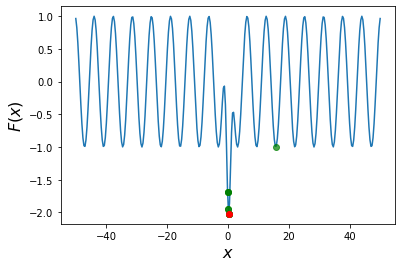

In [115]:
def Fcelu(x):
    return np.cos(x) - 3 * np.exp(-(x - 0.2) ** 2)

x_historia = []

def track_history(xk, convergence=None):
    x_historia.append(xk)

bounds = [(-50, 50)]  # Bounds for the optimization variables
x_opt = optimize.differential_evolution(Fcelu, bounds, callback=track_history).x
# ------------------------------------------------------------------

x_historia_array = np.array([x[0] for x in x_historia])
print(f"Mnimum to f({x_opt[0]}) = {Fcelu(x_opt[0])}")

xx = np.linspace(*bounds[0], 300)
plt.plot(xx,Fcelu(xx))
plt.plot(x_historia_array, Fcelu(x_historia_array), 'o', color='green', alpha=0.7)
plt.plot(x_opt, Fcelu(x_opt), 'ro')
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$F(x)$', fontsize=16)
plt.show()

$$F(\mathbf{x})=\sin x + \sin (3x-0.3)$$

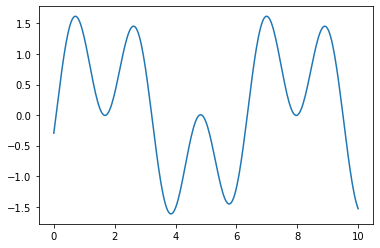

In [117]:
def Fcelu(x):
    return np.sin(x) + np.sin(3*x-0.3)

def negFcelu(x):
  return -Fcelu(x)

os_x = np.linspace(0,10, 300)
plt.plot(os_x, Fcelu(os_x))
plt.show()

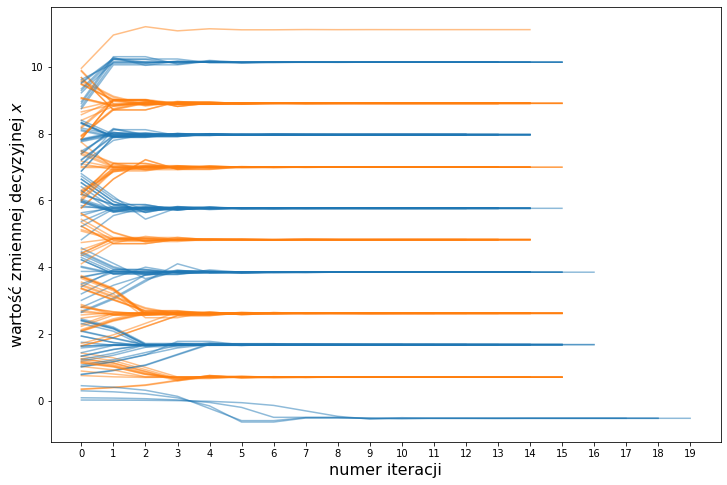

In [122]:
plt.figure(figsize=(12,8))
for _ in range(100):
  x_opt, x_historia = optimize.fmin(Fcelu, np.random.uniform(0,10), disp=False, retall=True)
  plt.plot(x_historia, color='tab:blue', alpha=0.5)
  x_opt, x_historia = optimize.fmin(negFcelu, np.random.uniform(0,10), disp=False, retall=True)
  plt.plot(x_historia, color='tab:orange', alpha=0.5)

plt.xticks(np.arange(20))
plt.xlabel('numer iteracji', fontsize=16)
plt.ylabel(r'wartość zmiennej decyzyjnej $x$', fontsize=16)
plt.show()

**Popróbuj**: zastąp procedurę `fmin` inną i zobacz, jak to wpływa na wyniki powyższej symulacji.

/home/jakubner/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


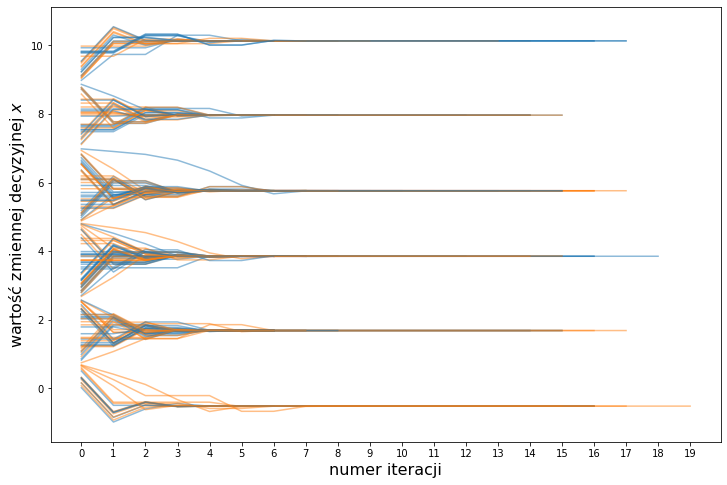

In [147]:
x_historia = []

def track_history(xk, convergence=None):
    x_historia.append(xk)

method = [
  'Nelder-Mead',
  'Powell' ,
  'CG' ,
  'BFGS' ,
  'Newton-CG',
  'L-BFGS-',
  'TNC' ,
  'COBYLA' ,
  'SLSQP' ,
  'trust-constr',
  ]
selected_method = method[-1] 
ticks_num = 0

plt.figure(figsize=(12,8))
for _ in range(100):
  ticks_num = max(ticks_num, len(x_historia))
  x_historia = []
  x_opt = optimize.minimize(Fcelu, np.random.uniform(0,10), method=selected_method, callback=track_history)
  plt.plot(x_historia, color='tab:blue', alpha=0.5)

  ticks_num = max(ticks_num, len(x_historia))
  x_historia = []
  x_opt = optimize.minimize(Fcelu, np.random.uniform(0,10), method=selected_method, callback=track_history)
  plt.plot(x_historia, color='tab:orange', alpha=0.5)

plt.xticks(np.arange(ticks_num))
plt.xlabel('numer iteracji', fontsize=16)
plt.ylabel(r'wartość zmiennej decyzyjnej $x$', fontsize=16)
plt.show()

Wizualizacja rezultatów optymalizacji funkcji dwu zmiennych ($\mathbf{x}\in \Re^2$) wymaga poznania technik **rysowania wykresów funkcji dwuwymiarowych**.

Poniżej wprowadzenie poprzez przykłady.

In [155]:
os_x1 = np.arange(0,5)
os_x2 = np.arange(2,6)
print(os_x1)
print(os_x2)

[0 1 2 3 4]
[2 3 4 5]


In [156]:
siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)
print(siatka_X1, end='\n\n')
print(siatka_X2)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]

[[2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]


Wiesz już co robi `meshgrid` i dlaczego nazwałem wyniki `siatka_`?

In [157]:
def F(x):
  x1, x2 = x
  return x1 + x2 

macierz_Z = F([siatka_X1, siatka_X2])
macierz_Z

array([[2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8],
       [5, 6, 7, 8, 9]])

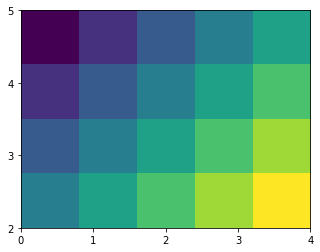

In [158]:
plt.imshow(macierz_Z, extent=[os_x1.min(), os_x1.max(), os_x2.min(), os_x2.max()])
plt.xticks(os_x1)
plt.yticks(os_x2)
plt.show()

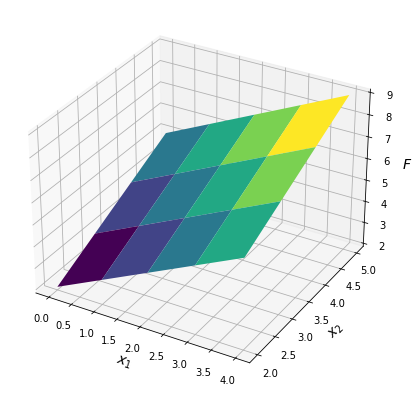

In [159]:
fig, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection':'3d'})
ax.plot_surface(siatka_X1, siatka_X2, macierz_Z, cmap='viridis')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$F$', fontsize=14)
plt.show()

W celu lepszego zrozumienia działania procedur optymalizacji i uczenia maszynowego warto zaprzyjaźnić się z formą kwadratową:

$$ \mathbf{x}^{\text{T}} A \mathbf{x},$$

przy czym do wizualizacji wystarczy rozważyć jej dwuwymiarowe wcielenie: $\mathbf{x} \in \Re^2$, $A \in \Re^{2 \times 2}$. <br>
Skorzystaj z kodu poniżej, by oswoić się z wykresami formy kwadratowej dla różnych wartości współrzędnych macierzy $\mathbf{A}$.

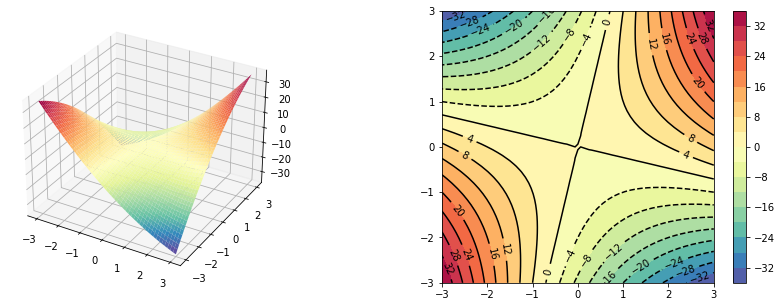

In [167]:
def forma_kwad(x, A):
  x1, x2 = x
  a, b, c, d = A.flatten()
  return a*x1**2 + d*x2**2 + (b+c)*x1*x2       
  # zagadka: dlaczego w powyższej linii zdecydowałem się uniknąć działań na macierzach,
  # skoro tak doskonale mam je opanowane? 

# ================================
A = np.array([[1,2], 
              [2,-1]])
# ================================

rozdzielczosc = 50
os_x1 = np.linspace(start=-3, stop=3, num=rozdzielczosc)
os_x2 = np.linspace(start=-3, stop=3, num=rozdzielczosc)
siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)
macierz_Z = forma_kwad([siatka_X1, siatka_X2], A)

cmap = 'Spectral_r'
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(siatka_X1, siatka_X2, macierz_Z, 
                rcount=rozdzielczosc, ccount=rozdzielczosc, cmap=cmap) 

rozdzielczosc_konturu = 20
ax = fig.add_subplot(1, 2, 2)
c = ax.contourf(siatka_X1, siatka_X2, macierz_Z, 
                rozdzielczosc_konturu, cmap=cmap)
c2 = ax.contour(siatka_X1, siatka_X2, macierz_Z, 
                rozdzielczosc_konturu, colors='black')
ax.set_aspect('equal')
fig.colorbar(c, ax=ax)
plt.clabel(c2, inline=True, fontsize=10)
plt.show()

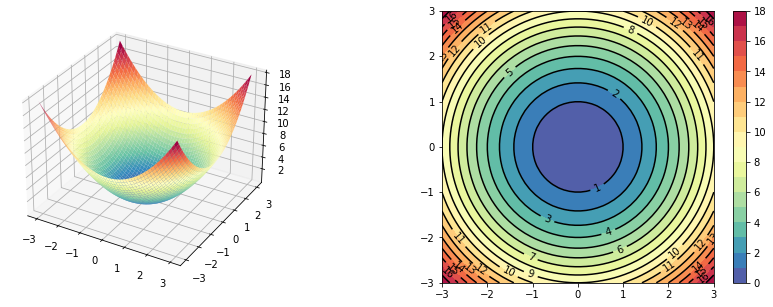

In [169]:
def forma_kwad(x, A):
  x1, x2 = x
  a, b, c, d = A.flatten()
  return a*x1**2 + d*x2**2 + (b+c)*x1*x2       
  # zagadka: dlaczego w powyższej linii zdecydowałem się uniknąć działań na macierzach,
  # skoro tak doskonale mam je opanowane? 

# ================================
A = np.array([[1,0], 
              [0,1]])
# ================================

rozdzielczosc = 50
os_x1 = np.linspace(start=-3, stop=3, num=rozdzielczosc)
os_x2 = np.linspace(start=-3, stop=3, num=rozdzielczosc)
siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)
macierz_Z = forma_kwad([siatka_X1, siatka_X2], A)

cmap = 'Spectral_r'
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(siatka_X1, siatka_X2, macierz_Z, 
                rcount=rozdzielczosc, ccount=rozdzielczosc, cmap=cmap) 

rozdzielczosc_konturu = 20
ax = fig.add_subplot(1, 2, 2)
c = ax.contourf(siatka_X1, siatka_X2, macierz_Z, 
                rozdzielczosc_konturu, cmap=cmap)
c2 = ax.contour(siatka_X1, siatka_X2, macierz_Z, 
                rozdzielczosc_konturu, colors='black')
ax.set_aspect('equal')
fig.colorbar(c, ax=ax)
plt.clabel(c2, inline=True, fontsize=10)
plt.show()

Oto funkcja opakowująca wszystkie rutynowe czynności przy rysowaniu wykresu trójwymiarowego. 

In [170]:
def pokaz_3D(Fcelu, zakres):
  os_x1 = np.linspace(zakres[0], zakres[1], 50)
  os_x2 = np.linspace(zakres[2], zakres[3], 50)
  siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)

  fig, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection':'3d'})
  ax.plot_surface(siatka_X1, siatka_X2, Fcelu([siatka_X1, siatka_X2]), cmap='Spectral_r')
  ax.set_xlabel('$x_1$', fontsize=14)
  ax.set_ylabel('$x_2$', fontsize=14)
  ax.set_zlabel('$F$', fontsize=14)
  plt.show()


A tak się z niej korzysta.

$$F(\mathbf{x})=3(x_1-2)^2 \cdot (x_2+1)^2$$

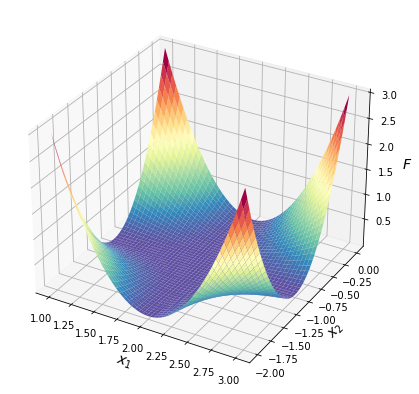

In [173]:
def Fcelu(x):
  x1, x2 = x
  return 3*(x1-2)**2 * (x2+1)**2

pokaz_3D(Fcelu, zakres=[1,3, -2,0])

A oto analogiczna funkcja rysująca na płaszczyźnie, ale za to pokazująca całą historię poszukiwań rozwiązania optymalnego. 

In [212]:
def pokaz_2D(Fcelu, x_historia, zakres):
  x_pocz, x_opt = x_historia[0], x_historia[-1]
  os_x1 = np.linspace(zakres[0], zakres[1], num=100)
  os_x2 = np.linspace(zakres[2], zakres[3], num=100)
  siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)
  macierz_Z = Fcelu([siatka_X1, siatka_X2])

  fig, ax = plt.subplots(figsize=(8,8))
  cplot = ax.contourf(siatka_X1, siatka_X2, macierz_Z, 10, cmap='Spectral_r', alpha=1)
  clines = ax.contour(siatka_X1, siatka_X2, macierz_Z, 10, colors='black')
  for punkt in x_historia:
      ax.plot(punkt[0], punkt[1], 'o', 
              color='magenta', markeredgecolor='black', markersize=10, alpha=1)
  ax.plot(x_pocz[0], x_pocz[1], 'd', 
          color='gray', markeredgecolor='black', markersize=10, alpha=0.7)    
  ax.plot(x_opt[0], x_opt[1], 'h', 
          color='white', markeredgecolor='black', markersize=15)
  ax.set_aspect('equal')
  ax.set_xlabel(r'$x_1$', fontsize=16)
  ax.set_ylabel(r'$x_2$', fontsize=16)
  ax.clabel(clines)
  fig.colorbar(cplot)
  return fig, ax

Tak się z niej korzysta.

$$F(\mathbf{x}) = (x_1 - 1)^2 + (x_2 + 2)^2$$

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 92


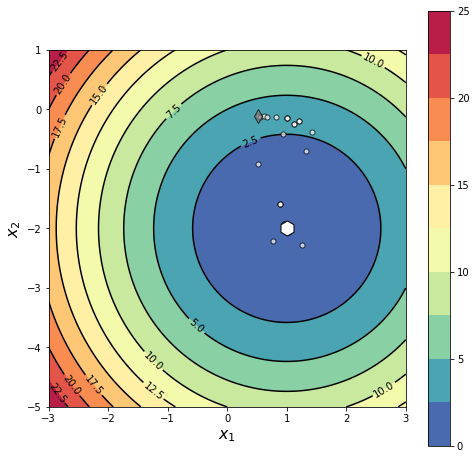

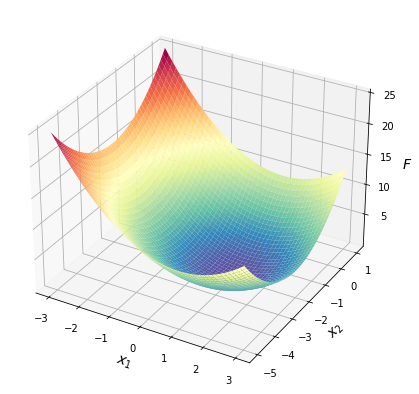

In [175]:
def Fcelu(x):
  x1, x2 = x
  return (x1 - 1)**2 + (x2 + 2)**2

x_opt, x_historia = optimize.fmin(Fcelu,
                                  np.random.uniform(-1,1, size=2),
                                  retall=True)

zakres=[-3, 3, -5, 1]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres)

Funkcja Rosenbrocka:
$$F(\mathbf{x}) = (1-x_1)^2 + 100(x_2 - x_1^2)^2$$

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 74
         Function evaluations: 140


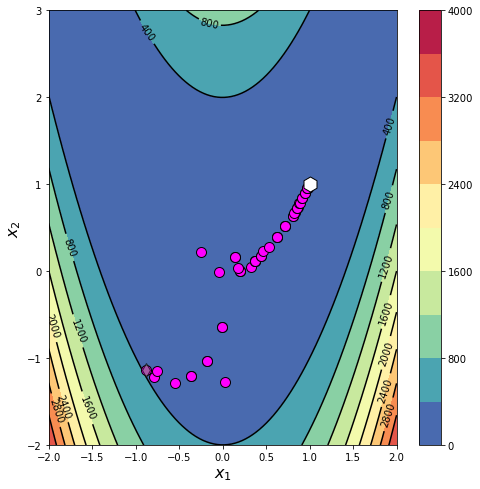

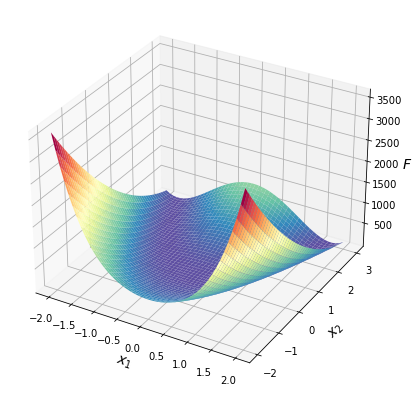

In [213]:
def Fcelu(x):
    x1, x2 = x
    return (1-x1)**2 + 100*(x2-x1**2)**2

# każda zmienna decyzyjna jest losowana z innego zakresu
x_pocz = (np.random.uniform(-1,2), np.random.uniform(-2,1))
x_opt, x_historia = optimize.fmin(Fcelu, x_pocz, retall=True)

zakres=[-2, 2, -2, 3]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres)

$$F(\mathbf{x}) = \left(\exp\left[-x_1-1\right]\right)^2 + (x_2+2)^2 - x_1x_2 + 10\left(\sin 4x_1 + \cos 5x_2\right)$$

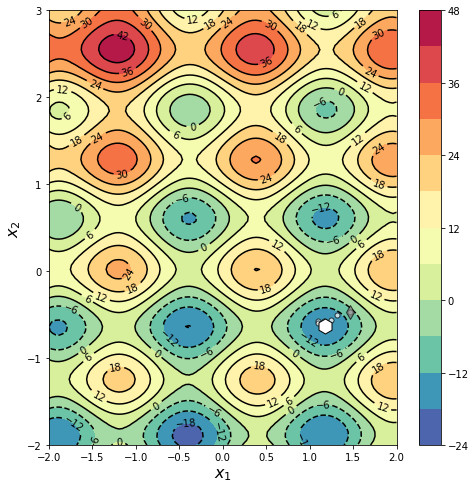

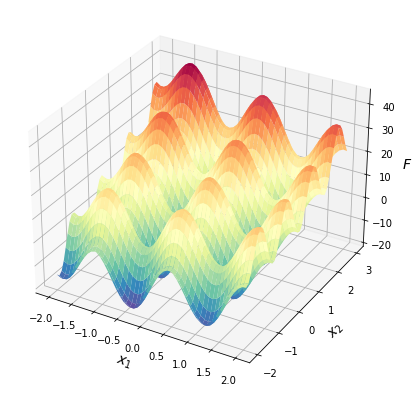

In [182]:
def Fcelu(x):
  x1, x2 = x
  return np.exp(-x1-1)**2 + (x2+2)**2 - x1*x2 + 10*(np.sin(4*x1) + np.cos(5*x2))

x_pocz = (np.random.uniform(-2,2), np.random.uniform(-2,3))
x_opt, x_historia = optimize.fmin(Fcelu, x_pocz, retall=True, disp=False)

zakres=[-2, 2, -2, 3]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres)

**W domu**: znajdź maksimum poniższej funkcji celu:
$$F(\mathbf{x}) = \left(4\sin\pi x_1 + 6\sin\pi x_2\right) + (x_1-1)^2 + (x_2-1)^2$$
i zwizualizuj rozwiązanie.

Maximum:  1.9999999999999997e+46


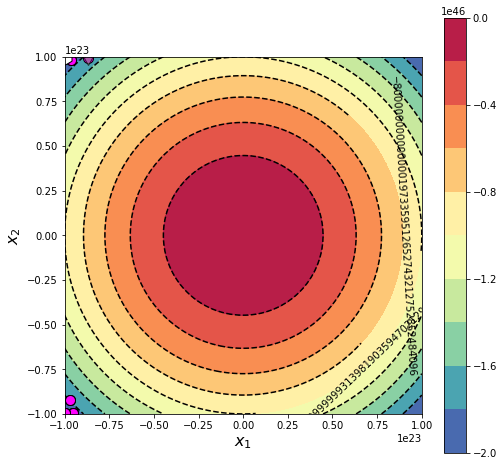

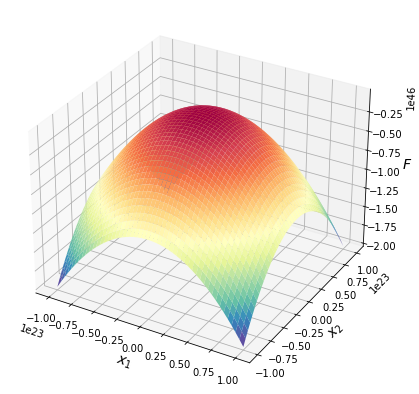

In [258]:
from numpy import sin, cos, pi

def Fcelu(x):
  x1, x2 = x
  return - ((4*sin(pi*x1) + 6*sin(pi*x2)) + (x1-1)**2 + (x2-1)**2)

x_historia = []

def track_history(xk, convergence=None):
    x_historia.append(xk)


zakres=np.array([(-100_000_000_000_000_000_000_000, 100_000_000_000_000_000_000_000),(-100_000_000_000_000_000_000_000, 100_000_000_000_000_000_000_000)])
x_opt = optimize.differential_evolution(Fcelu, zakres, callback=track_history).x


print("Maximum: ", -Fcelu(x_opt))
pokaz_2D(Fcelu, x_historia, zakres.flatten())
plt.show()
pokaz_3D(Fcelu, zakres.flatten())

In [260]:
from sympy import exp, symbols, oo, sin
x, y = symbols('x y')
exp = Fcelu((x,y))

res_exp = exp.subs(x,-oo).subs(y,-oo)
res_exp

-oo

**Wizualizacja uwzględniająca ograniczenia**

In [250]:
def pokaz2D_z_ogr(Fcelu, x_pocz, x_opt, zakres, ograniczenia, gx=None):
  fig, ax = pokaz_2D(Fcelu, x_historia=[x_pocz, x_opt], zakres=zakres)

  if 'fun' in ograniczenia:
    os_x1 = np.linspace(zakres[0], zakres[1], num=100)
    krzywa_g_x1 = gx(os_x1)
    ax.plot(os_x1, krzywa_g_x1, color='black')
    ax.fill_between(os_x1, krzywa_g_x1, color='grey', alpha=0.7)
    ax.set_ylim(*zakres[2:])
  else:
    obszar_dopuszczalny = plt.Rectangle((ograniczenia['x1'][0], ograniczenia['x2'][0]),
                                        ograniczenia['x1'][1]-ograniczenia['x1'][0],
                                        ograniczenia['x2'][1]-ograniczenia['x2'][0],
                                        facecolor='gray', edgecolor='black', alpha=0.7)
    ax.add_patch(obszar_dopuszczalny)
  ax.plot(x_pocz[0], x_pocz[1], 'd', 
          color='gray', markeredgecolor='black', markersize=10, alpha=0.7) 
  return fig, ax

Funkcja celu: 
$$F(\mathbf{x}) = (x_1-1)^2 + (x_2+2)^2 + x_1x_2$$
Ograniczenia: 
$$3.5 \leq x_1 \leq 6$$
$$-5 \leq x_2 \leq -2$$

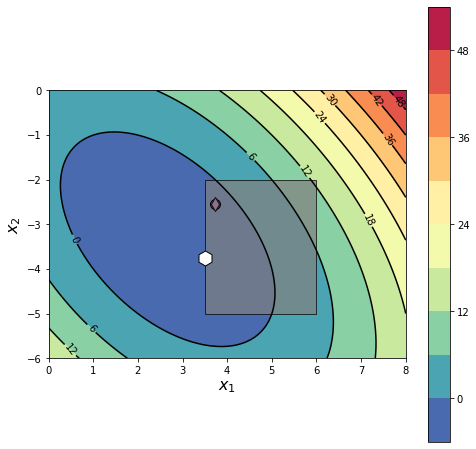

In [251]:
def Fcelu(x):
  x1, x2 = x
  return (x1-1)**2 + (x2+2)**2 +x1*x2

ograniczenia = {'x1': (3.5, 6), 
                'x2': (-5,-2)}

x_pocz = (np.random.uniform(*ograniczenia['x1']),
          np.random.uniform(*ograniczenia['x2']))
x_opt = optimize.minimize(Fcelu, x_pocz, method='TNC', bounds=list(ograniczenia.values())).x

zakres = [0, 8, -6, 0]
pokaz2D_z_ogr(Fcelu, x_pocz, x_opt, zakres, ograniczenia)
plt.show()

Funkcja celu: 
$$F(\mathbf{x}) = (x_1-1)^2 + (x_2+2)^2 + x_1x_2$$
Ograniczenia: 
$$g(\mathbf{x}) = x_2 + 2 + 2(x_1-3)^2 - (x_1 - 3)^4 \geq 0$$

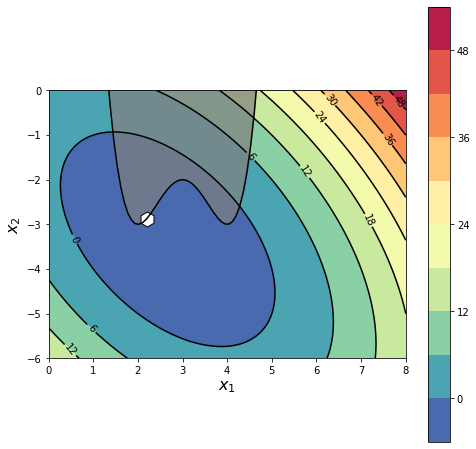

In [253]:
def g(x):
  x1, x2 = x
  return x2 + 2 + 2*(x1-3)**2 - (x1-3)**4

# w celu narysowania krzywej g(x)=0 trzeba zdefiniować osobną funkcję
# można wyznaczyć jej postać automatycznie biblioteką SymPy, jeżeli włożyć w to trochę wysiłku
gx = lambda x1: -2 -2*(x1-3)**2 + (x1-3)**4       

ograniczenia = {'type': 'ineq', 'fun': g}

x_pocz = np.random.uniform(-5,5, size=2)
x_opt = optimize.minimize(Fcelu, x_pocz, method='SLSQP', constraints=ograniczenia).x

zakres = [0, 8, -6, 0]
pokaz2D_z_ogr(Fcelu, x_pocz, x_opt, zakres, ograniczenia, gx)
plt.show()

**Zastanów się**, jakie nowe możliwości daje Ci znajomość technik optymalizacji w zakresie dopasowywania modeli do danych.